In [2]:
import pandas as pd
data = pd.DataFrame(
    {
        'time': [1, 4, 7, 12, 14, 20, 26, 40, 45],
        'event': [True, True, True, False, True, False, True, False, False]
    },
    index = ['Alice', 'Bob', 'Charlie', 'Dan', 'Eve', 'Frank', 'Grace', 'Heidi', 'Ivan']
)

## Survival function 추정

먼저 생존함수를 추정해 봅시다. 다음 코드로 간단하게 할 수 있습니다.

<AxesSubplot:xlabel='time (days)', ylabel='survival function, $\\hat{S}(t)$'>

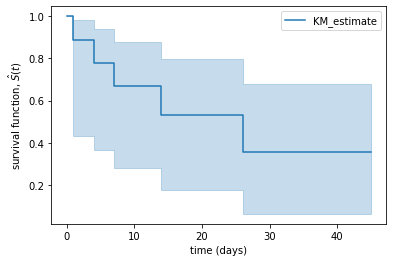

In [3]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(data["time"], data["event"])

plot = kmf.plot_survival_function()
plot.set_xlabel('time (days)')
plot.set_ylabel('survival function, $\hat{S}(t)$')
plot

파란선은 생존함숫값입니다. 시간이 지날수록 이탈자가 발생하며 낮아지는 것을 볼 수 있습니다. 하늘색 영역은 신뢰구간입니다. 

KaplanMeierFitter에 alpha 값을 지정해 조절할 수 있습니다. 기본값은 0.05 (95%)입니다.


## Cumulative hazard function 추정
이번에는 누적위험함수를 추정해 봅시다. Nelson-Aalen estimator로 추정할 수 있습니다.

<AxesSubplot:xlabel='time (days)', ylabel='cumulative hazard function, $\\hat{Λ}(t)$'>

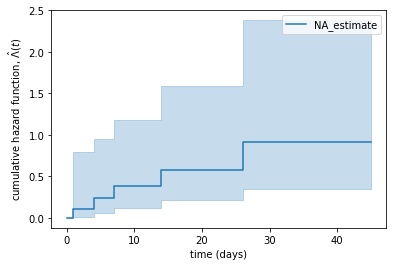

In [4]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(data["time"], data["event"])

plot = naf.plot_cumulative_hazard()
plot.set_xlabel('time (days)')
plot.set_ylabel('cumulative hazard function, $\hat{Λ}(t)$')
plot

In [5]:
data_A = pd.DataFrame(
    {
        'time': [2, 4, 9, 12, 19, 23, 26, 41, 48],
        'event': [True, True, False, False, False, True, True, False, False]
    },
    index = ['Alice_A', 'Bob_A', 'Charlie_A', 'Dan_A', 'Eve_A', 'Frank_A', 'Grace_A', 'Heidi_A', 'Ivan_A']
)

data_B = pd.DataFrame(
    {
        'time': [1, 4, 7, 12, 14, 20, 26, 40, 45],
        'event': [True, True, True, False, True, False, True, False, False]
    },
    index = ['Alice_B', 'Bob_B', 'Charlie_B', 'Dan_B', 'Eve_B', 'Frank_B', 'Grace_B', 'Heidi_B', 'Ivan_B']
)

## 효과 분석
두 그룹의 생존함수와 누적위험함수를 각각 추정해 봅시다.

<AxesSubplot:xlabel='time (days)', ylabel='survival function, $\\hat{S}(t)$'>

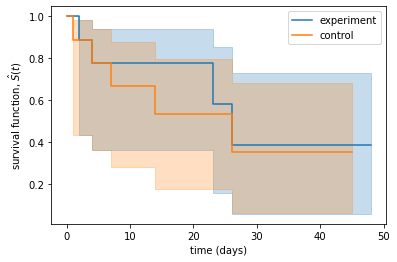

In [8]:
kmf = KaplanMeierFitter()
kmf.fit(data_A["time"], data_A["event"], label="experiment")
ax_kmf = kmf.plot()
kmf.fit(data_B["time"], data_B["event"], label="control")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
ax_kmf

<AxesSubplot:xlabel='time (days)', ylabel='cumulative hazard function, $\\hat{Λ}(t)$'>

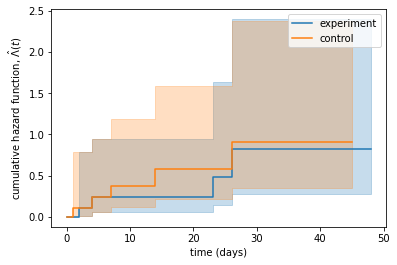

In [9]:
naf = NelsonAalenFitter()
naf.fit(data_A["time"], data_A["event"], label="experiment")
ax_naf = naf.plot()
naf.fit(data_B["time"], data_B["event"], label="control")
ax_naf = naf.plot(ax=ax_naf)

ax_naf.set_xlabel('time (days)')
ax_naf.set_ylabel('cumulative hazard function, $\hat{Λ}(t)$')
ax_naf

### 유의성 검증
Logrank test는 생존함수 분포를 비교하고 유의한 차이가 있는지 알아보는 가설 검정 기법입니다. Mantel-Cox test라고도 합니다. 파이썬에서는 다음과 같이 Logrank test를 실행할 수 있습니다.



In [10]:
from lifelines.statistics import logrank_test
logrank_test(data_A["time"], data_B["time"], data_A["event"], data_B["event"]).p_value

0.6791912509835747